In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  
from sklearn.feature_selection import VarianceThreshold

In [ ]:
#df = pd.read_csv(r'electric_vehicles_spec_2025.csv')
df = pd.read_csv("train.csv", engine='pyarrow')
print(df)
##train.csv

In [ ]:
df.shape     #filas, columna
# 508 columns   
# 177024 rows

(177024, 508)

In [ ]:
df.head() #Revisió inicial de datos

id p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  \
0  p01_0   p01  06:10:00      NaN      NaN      9.6      NaN      NaN   
1  p01_1   p01  06:25:00      NaN      NaN      9.7      NaN      NaN   
2  p01_2   p01  06:40:00      NaN      NaN      9.2      NaN      NaN   
3  p01_3   p01  06:55:00      NaN      NaN      8.7      NaN      NaN   
4  p01_4   p01  07:10:00      NaN      NaN      8.4      NaN      NaN   

   bg-5:30  bg-5:25  ...  activity-0:40  activity-0:35  activity-0:30  \
0      9.7      NaN  ...            NaN            NaN            NaN   
1      9.2      NaN  ...            NaN            NaN            NaN   
2      8.7      NaN  ...            NaN            NaN            NaN   
3      8.4      NaN  ...            NaN            NaN            NaN   
4      8.1      NaN  ...            NaN            NaN            NaN   

   activity-0:25  activity-0:20  activity-0:15  activity-0:10  activity-0:05  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   activity-0:00  bg+1:00  
0            NaN     13.4  
1            NaN     12.8  
2            NaN     15.5  
3            NaN     14.8  
4            NaN     12.7  

[5 rows x 508 columns]

# 📄 Column Descriptions

- **`id`**  
  Row ID consisting of the participant number and a count for that participant.

- **`p_num`**  
  Participant number.

- **`time`**  
  Time of day in the format `HH:MM:SS`.

- **`bg-X:XX`**  
  Blood glucose reading in mmol/L, where `X:XX (H:MM)` is the time in the past  
  (e.g., `bg-2:35` means the reading from **2 hours and 35 minutes before** the time value for that row),  
  recorded by the continuous glucose monitor.

- **`insulin-X:XX`**  
  Total insulin dose received in **units** in the last 5 minutes. `X:XX` refers to the time in the past  
  (e.g., `insulin-2:35` is the insulin dose **between 2:40 and 2:35 before** the time value),  
  recorded by the insulin pump.

- **`carbs-X:XX`**  
  Total carbohydrate intake in **grams** in the last 5 minutes. `X:XX` indicates the time window in the past  
  (e.g., `carbs-2:35` is the amount **between 2:40 and 2:35 before** the time value),  
  recorded by the participant.

- **`hr-X:XX`**  
  Mean heart rate in **beats per minute** in the last 5 minutes. `X:XX` represents the past time window  
  (e.g., `hr-2:35` is the mean heart rate **between 2:40 and 2:35 before** the time value),  
  recorded by the smartwatch.

- **`steps-X:XX`**  
  Total steps walked in the last 5 minutes. `X:XX` indicates the time in the past  
  (e.g., `steps-2:35` = steps **between 2:40 and 2:35 before** the row's time),  
  recorded by the smartwatch.

- **`cals-X:XX`**  
  Total calories burned in the last 5 minutes. `X:XX` refers to time in the past  
  (e.g., `cals-2:35` = calories **burned between 2:40 and 2:35 before** the row time),  
  calculated by the smartwatch.

- **`activity-X:XX`**  
  Self-declared activity performed in the last 5 minutes. `X:XX` refers to time in the past  
  (e.g., `activity-2:35` shows the **activity name between 2:40 and 2:35 before** the row time),  
  set manually on the smartwatch.

- **`bg+1:00`**  
  Blood glucose reading in mmol/L **one hour in the future** — this is the **target variable** to be predicted  
  (note: not provided in `test.csv`).


In [ ]:
# # df.dtypes  #tipo de datos

# # Create a DataFrame from dtypes
# column_types = pd.DataFrame({
#     'Column Name': df.columns,
#     'Data Type': df.dtypes.values
# })

# # Optional: display full table without truncation
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.width', None)

# # Show the table
# from IPython.display import display, HTML
# import pandas as pd

# # Add "#" column as row index
# column_types = pd.DataFrame({
#     '#': range(len(df.columns)),
#     'Column Name': df.columns,
#     'Data Type': df.dtypes.values
# })

# # Split into chunks
# chunk_size = 100
# chunks = [column_types.iloc[i:i+chunk_size] for i in range(0, len(column_types), chunk_size)]

# # Display 5 chunks side by side
# for i in range(0, len(chunks), 5):
#     html = ''
#     for j in range(5):
#         if i + j < len(chunks):
#             html += chunks[i + j].to_html(index=False)
#     display(HTML(f"<div style='display:flex; gap:50px;'>{html}</div>"))

# # Now print column names or head
# # print(df.columns)       # Shows all column names
# # print(df.head(1))       # Shows first row with all columns

In [ ]:
df.describe(include = 'all').T

count  unique        top   freq       mean         std  \
id               177024  177024  p12_25282      1        NaN         NaN   
p_num            177024       9        p03  26028        NaN         NaN   
time             177024     288   11:55:00    640        NaN         NaN   
bg-5:55        149770.0     NaN        NaN    NaN   8.211018    2.852188   
bg-5:50        158533.0     NaN        NaN    NaN   8.230449    2.913438   
bg-5:45        163364.0     NaN        NaN    NaN   8.253291    2.945594   
bg-5:40        149766.0     NaN        NaN    NaN   8.210988     2.85209   
bg-5:35        158254.0     NaN        NaN    NaN   8.229649    2.911313   
bg-5:30        163770.0     NaN        NaN    NaN   8.254083    2.947651   
bg-5:25        149763.0     NaN        NaN    NaN   8.211049    2.852212   
bg-5:20        157973.0     NaN        NaN    NaN   8.228888    2.909304   
bg-5:15        164174.0     NaN        NaN    NaN   8.254602    2.949689   
bg-5:10        149771.0     NaN        NaN    NaN      8.211    2.852315   
bg-5:05        157677.0     NaN        NaN    NaN    8.22835    2.907124   
bg-5:00        164585.0     NaN        NaN    NaN   8.255273    2.951804   
bg-4:55        149780.0     NaN        NaN    NaN   8.211187    2.852184   
bg-4:50        157381.0     NaN        NaN    NaN   8.228395    2.904586   
bg-4:45        164995.0     NaN        NaN    NaN   8.256113    2.954168   
bg-4:40        149800.0     NaN        NaN    NaN   8.211492    2.852085   
bg-4:35        157087.0     NaN        NaN    NaN   8.228119    2.902274   
bg-4:30        165418.0     NaN        NaN    NaN   8.256776    2.956386   
bg-4:25        149819.0     NaN        NaN    NaN   8.211555    2.852075   
bg-4:20        156784.0     NaN        NaN    NaN   8.227941    2.900141   
bg-4:15        165834.0     NaN        NaN    NaN   8.257407    2.958584   
bg-4:10        149831.0     NaN        NaN    NaN    8.21155    2.852396   
bg-4:05        156476.0     NaN        NaN    NaN   8.227752    2.898357   
bg-4:00        166260.0     NaN        NaN    NaN    8.25822     2.96091   
bg-3:55        149849.0     NaN        NaN    NaN   8.211743    2.852594   
bg-3:50        156177.0     NaN        NaN    NaN   8.227548    2.896473   
bg-3:45        166684.0     NaN        NaN    NaN   8.259532    2.962944   
bg-3:40        149877.0     NaN        NaN    NaN   8.212123    2.852697   
bg-3:35        155887.0     NaN        NaN    NaN   8.227183    2.894691   
bg-3:30        167124.0     NaN        NaN    NaN   8.260976    2.964921   
bg-3:25        149918.0     NaN        NaN    NaN   8.212331    2.852872   
bg-3:20        155604.0     NaN        NaN    NaN   8.226789     2.89255   
bg-3:15        167575.0     NaN        NaN    NaN   8.262528    2.966625   
bg-3:10        149964.0     NaN        NaN    NaN   8.212834    2.852634   
bg-3:05        155322.0     NaN        NaN    NaN   8.226376    2.889888   
bg-3:00        168030.0     NaN        NaN    NaN    8.26418     2.96861   
bg-2:55        150011.0     NaN        NaN    NaN   8.213568    2.852659   
bg-2:50        155037.0     NaN        NaN    NaN   8.226231    2.887842   
bg-2:45        168487.0     NaN        NaN    NaN    8.26571    2.970579   
bg-2:40        150061.0     NaN        NaN    NaN   8.214246    2.852778   
bg-2:35        154757.0     NaN        NaN    NaN   8.225972    2.885626   
bg-2:30        168952.0     NaN        NaN    NaN   8.267317    2.972569   
bg-2:25        150118.0     NaN        NaN    NaN   8.214785    2.852803   
bg-2:20        154488.0     NaN        NaN    NaN   8.225567     2.88312   
bg-2:15        169419.0     NaN        NaN    NaN   8.268805    2.973936   
bg-2:10        150183.0     NaN        NaN    NaN   8.215397    2.852523   
bg-2:05        154220.0     NaN        NaN    NaN   8.225077    2.880415   
bg-2:00        169902.0     NaN        NaN    NaN   8.270206    2.975518   
bg-1:55        150259.0     NaN        NaN    NaN   8.215739    2.

In [ ]:
import pandas as pd

# 1. Total rows
total_rows = len(df)

# 2. Null counts and percentages
null_counts = df.isnull().sum()
null_percentages = (null_counts / total_rows * 100).round(2)

# 3. Combine into summary table
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Percentage (%)': null_percentages
})

# 4. Add column for deletion suggestion
null_summary['Possible to Delete'] = null_summary['Percentage (%)'] > 50

# 5. Sort by percentage descending
null_summary_sorted = null_summary.sort_values(by='Percentage (%)', ascending=False)

# 6. Display the sorted table
pd.set_option('display.max_rows', None)
print("📊 Sorted null summary with deletion suggestion:")
display(null_summary_sorted)

⚠️ Columns with more than 50% missing values:


Null Count  Percentage (%)
carbs-5:55         174453           98.55
carbs-5:50         174485           98.57
carbs-5:45         174483           98.56
carbs-5:40         174453           98.55
carbs-5:35         174483           98.56
carbs-5:30         174490           98.57
carbs-5:25         174459           98.55
carbs-5:20         174482           98.56
carbs-5:15         174490           98.57
carbs-5:10         174460           98.55
carbs-5:05         174479           98.56
carbs-5:00         174488           98.57
carbs-4:55         174472           98.56
carbs-4:50         174475           98.56
carbs-4:45         174491           98.57
carbs-4:40         174472           98.56
carbs-4:35         174483           98.56
carbs-4:30         174496           98.57
carbs-4:25         174471           98.56
carbs-4:20         174480           98.56
carbs-4:15         174490           98.57
carbs-4:10         174472           98.56
carbs-4:05         174476           98.56
carbs-4:00         174492           98.57
carbs-3:55         174471           98.56
carbs-3:50         174473           98.56
carbs-3:45         174484           98.57
carbs-3:40         174473           98.56
carbs-3:35         174482           98.56
carbs-3:30         174479           98.56
carbs-3:25         174473           98.56
carbs-3:20         174475           98.56
carbs-3:15         174477           98.56
carbs-3:10         174472           98.56
carbs-3:05         174467           98.56
carbs-3:00         174471           98.56
carbs-2:55         174483           98.56
carbs-2:50         174462           98.55
carbs-2:45         174472           98.56
carbs-2:40         174480           98.56
carbs-2:35         174465           98.55
carbs-2:30         174461           98.55
carbs-2:25         174483           98.56
carbs-2:20         174467           98.56
carbs-2:15         174452           98.55
carbs-2:10         174484           98.57
carbs-2:05         174463           98.55
carbs-2:00         174453           98.55
carbs-1:55         174480           98.56
carbs-1:50         174454           98.55
carbs-1:45         174447           98.54
carbs-1:40         174474           98.56
carbs-1:35         174460           98.55
carbs-1:30         174441           98.54
carbs-1:25         174475           98.56
carbs-1:20         174462           98.55
carbs-1:15         174438           98.54
carbs-1:10         174479           98.56
carbs-1:05         174456           98.55
carbs-1:00         174443           98.54
carbs-0:55         174486           98.57
carbs-0:50         174460           98.55
carbs-0:45         174439           98.54
carbs-0:40         174488           98.57
carbs-0:35         174467           98.56
carbs-0:30         174438           98.54
carbs-0:25         174487           98.57
carbs-0:20         174459           98.55
carbs-0:15         174440           98.54
carbs-0:10         174481           98.56
carbs-0:05         174462           98.55
carbs-0:00         174441           98.54
steps-5:55          95691           54.06
steps-5:50          95663           54.04
steps-5:45          95648           54.03
steps-5:40          95672           54.04
steps-5:35          95652           54.03
steps-5:30          95613           54.01
steps-5:25          95644           54.03
steps-5:20          95639           54.03
steps-5:15          95602           54.01
steps-5:10          95606           54.01
steps-5:05          95611           54.01
steps-5:00          95582           53.99
steps-4:55          95572           53.99
steps-4:50          95574           53.99
steps-4:45          95556           53.98
steps-4:40          95532           53.97
steps-4:35          95538           53.97
steps-4:30          95521           53.96
steps-4:25          95489           53.94
steps-4:20          95517           53.96
steps-4:15          95518           53.96
steps-4:10          95459           53.92
steps-4:05          95493

In [ ]:
porcentaje_nulos = df.isnull().mean() * 100
print( porcentaje_nulos[ porcentaje_nulos > 0].sort_values(ascending=False))

carbs-4:30       98.571945
carbs-4:00       98.569685
carbs-4:45       98.569121
carbs-4:15       98.568556
carbs-5:15       98.568556
carbs-5:30       98.568556
carbs-0:40       98.567426
carbs-5:00       98.567426
carbs-0:25       98.566861
carbs-0:55       98.566296
carbs-5:50       98.565731
carbs-2:10       98.565166
carbs-3:45       98.565166
carbs-5:45       98.564601
carbs-5:35       98.564601
carbs-2:25       98.564601
carbs-4:35       98.564601
carbs-2:55       98.564601
carbs-3:35       98.564037
carbs-5:20       98.564037
carbs-0:10       98.563472
carbs-1:55       98.562907
carbs-4:20       98.562907
carbs-2:40       98.562907
carbs-3:30       98.562342
carbs-1:10       98.562342
carbs-5:05       98.562342
carbs-3:15       98.561212
carbs-4:05       98.560647
carbs-4:50       98.560082
carbs-1:25       98.560082
carbs-3:20       98.560082
carbs-1:40       98.559517
carbs-3:40       98.558952
carbs-3:25       98.558952
carbs-3:50       98.558952
carbs-4:10       98.558388
c

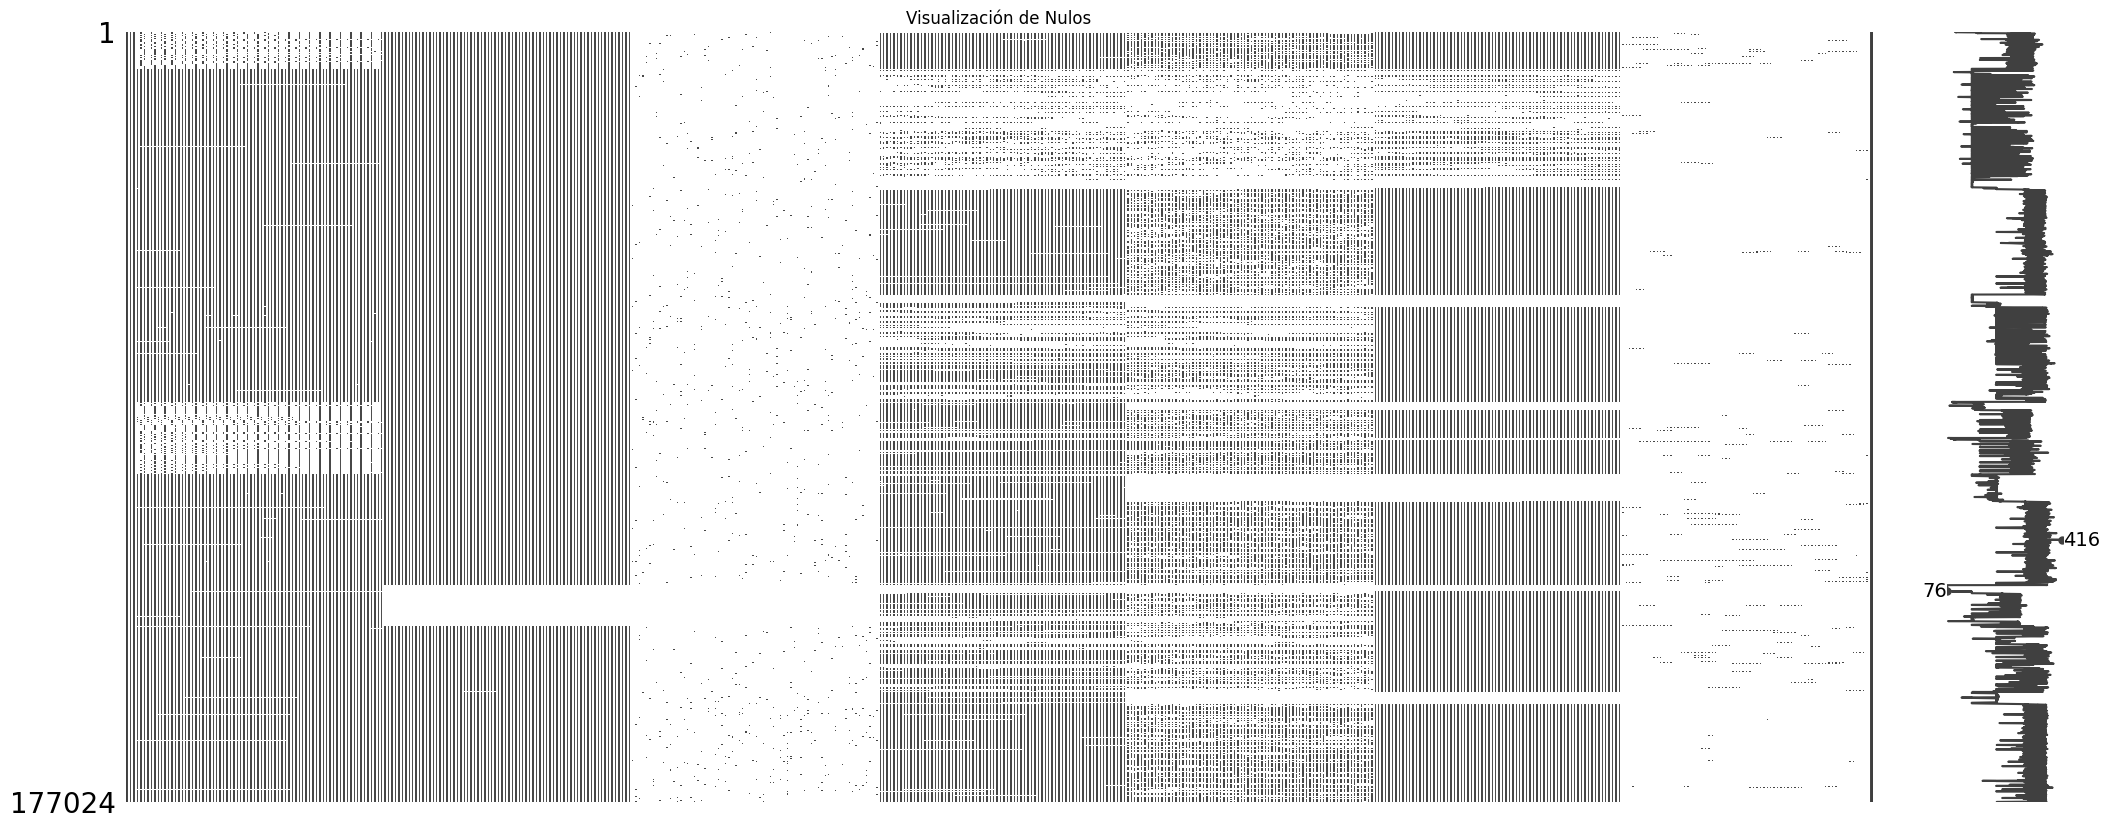

In [ ]:
msno.matrix(df)
plt.title("Visualización de Nulos")
plt.show()

In [ ]:
contador_u = df.nunique().sort_values()
print(contador_u [contador_u  < 10])

p_num    9
dtype: int64


In [ ]:
numerico_df = df.select_dtypes(include=np.number)
if numerico_df.shape[1] >= 2:
        corr = numerico_df.corr()
        print("\n📈 Correlación entre variables numéricas:")
        print(corr)


📈 Correlación entre variables numéricas:
               bg-5:55   bg-5:50   bg-5:45   bg-5:40   bg-5:35   bg-5:30  \
bg-5:55       1.000000  0.992528  0.975774  0.953065  0.926544  0.897773   
bg-5:50       0.992528  1.000000  0.992529  0.975781  0.954475  0.926662   
bg-5:45       0.975774  0.992529  1.000000  0.992530  0.975771  0.955985   
bg-5:40       0.953065  0.975781  0.992530  1.000000  0.992530  0.975794   
bg-5:35       0.926544  0.954475  0.975771  0.992530  1.000000  0.992534   
bg-5:30       0.897773  0.926662  0.955985  0.975794  0.992534  1.000000   
bg-5:25       0.867544  0.897823  0.926594  0.953110  0.975803  0.992535   
bg-5:20       0.836415  0.870161  0.897825  0.926622  0.954463  0.975797   
bg-5:15       0.805142  0.836775  0.874257  0.897890  0.926740  0.956069   
bg-5:10       0.774319  0.805263  0.836565  0.867725  0.897952  0.926688   
bg-5:05       0.744036  0.777880  0.805327  0.836654  0.870206  0.897977   
bg-5:00       0.714665  0.744707  0.784736  0.

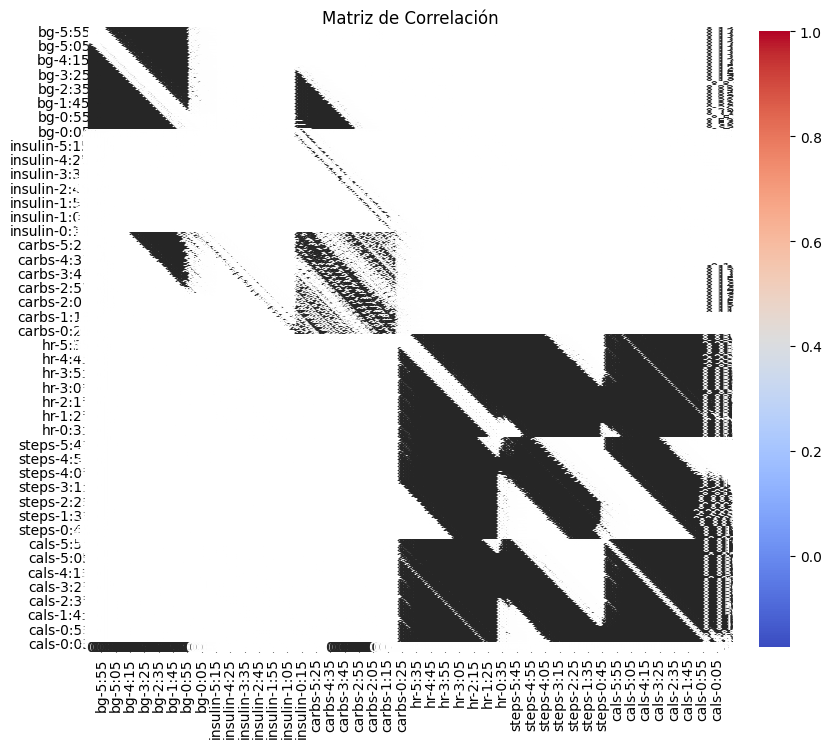

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


📈 Correlación entre variables numéricas:
               bg-5:55   bg-5:50   bg-5:45   bg-5:40   bg-5:35   bg-5:30  \
bg-5:55       1.000000  0.992528  0.975774  0.953065  0.926544  0.897773   
bg-5:50       0.992528  1.000000  0.992529  0.975781  0.954475  0.926662   
bg-5:45       0.975774  0.992529  1.000000  0.992530  0.975771  0.955985   
bg-5:40       0.953065  0.975781  0.992530  1.000000  0.992530  0.975794   
bg-5:35       0.926544  0.954475  0.975771  0.992530  1.000000  0.992534   
bg-5:30       0.897773  0.926662  0.955985  0.975794  0.992534  1.000000   
bg-5:25       0.867544  0.897823  0.926594  0.953110  0.975803  0.992535   
bg-5:20       0.836415  0.870161  0.897825  0.926622  0.954463  0.975797   
bg-5:15       0.805142  0.836775  0.874257  0.897890  0.926740  0.956069   
bg-5:10       0.774319  0.805263  0.836565  0.867725  0.897952  0.926688   
bg-5:05       0.744036  0.777880  0.805327  0.836654  0.870206  0.897977   
bg-5:00       0.714665  0.744707  0.784736  0.

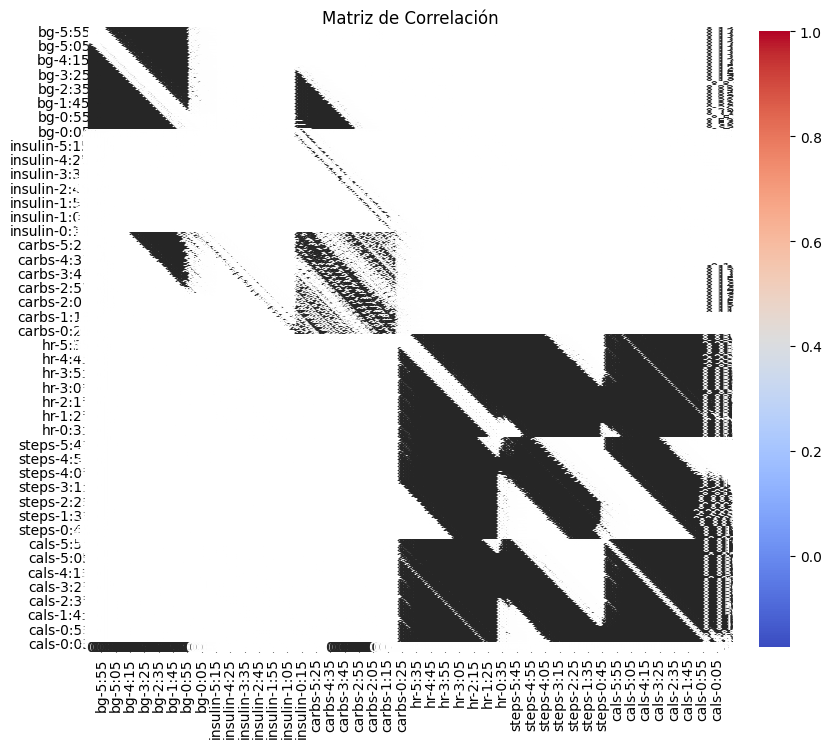


⚠️ Columnas altamente correlacionadas (>|0.7|):
['bg-5:50', 'bg-5:45', 'bg-5:40', 'bg-5:35', 'bg-5:30', 'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10', 'bg-5:05', 'bg-5:00', 'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40', 'bg-4:35', 'bg-4:30', 'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10', 'bg-4:05', 'bg-4:00', 'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40', 'bg-3:35', 'bg-3:30', 'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10', 'bg-3:05', 'bg-3:00', 'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40', 'bg-2:35', 'bg-2:30', 'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10', 'bg-2:05', 'bg-2:00', 'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40', 'bg-1:35', 'bg-1:30', 'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10', 'bg-1:05', 'bg-1:00', 'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40', 'bg-0:35', 'bg-0:30', 'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10', 'bg-0:05', 'bg-0:00', 'hr-5:50', 'hr-5:45', 'hr-5:40', 'hr-5:35', 'hr-5:30', 'hr-5:25', 'hr-5:20', 'hr-5:15', 'hr-5:10', 'hr-5:05', 'hr-5:00', 'hr-4:55', 'hr-4:50', 'hr-4:45', 'hr-4:40', 'hr-

In [ ]:
numerico_df = df.select_dtypes(include=np.number)
if numerico_df.shape[1] >= 2:
    corr = numerico_df.corr()
    print("\n📈 Correlación entre variables numéricas:")
    print(corr)

    # Visualización de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Matriz de Correlación")
    plt.show()

    # 6.1 Variables altamente correlacionadas ## contador 
    umbral = 0.7
    alta = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    alta_corr = [column for column in alta.columns if any(alta[column].abs() > umbral)]
    if alta_corr:
        print(f"\n⚠️ Columnas altamente correlacionadas (>|{umbral}|):")
        print(alta_corr)
    else:
        print(f"\n✅ No hay correlaciones mayores a {umbral}")
else:
    print("\n⚠️ No hay suficientes columnas numéricas para análisis de correlación")

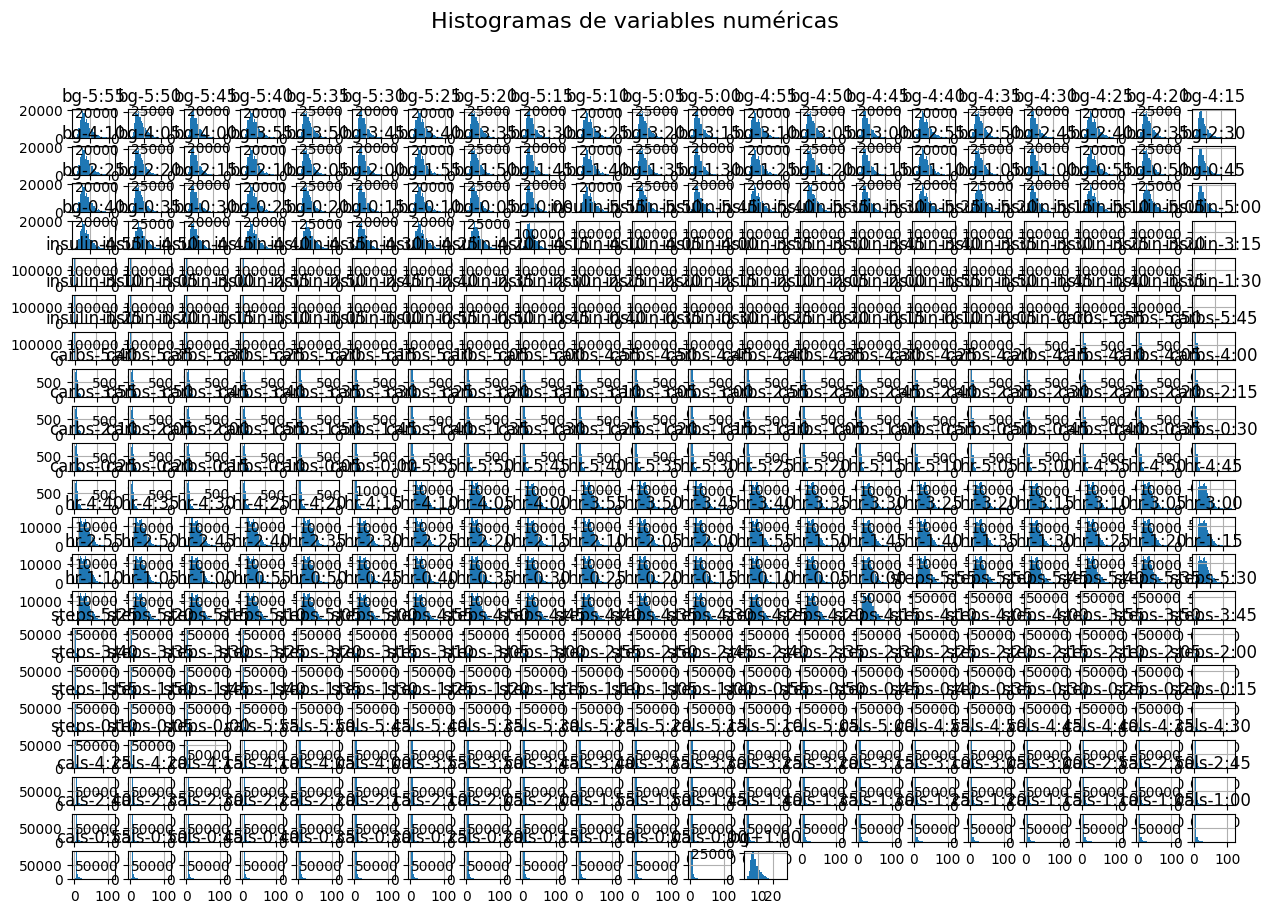

In [ ]:
numerico_df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Histogramas de variables numéricas", fontsize=16)
plt.show()

In [ ]:
selector = VarianceThreshold(threshold=0)
selector.fit(numerico_df.fillna(0))
baja_varianza_columnas = numerico_df.columns[~selector.get_support()]
if len(baja_varianza_columnas) > 0:
    print("\n📉 Columnas con varianza cero:")
    print(baja_varianza_columnas.tolist())
else:
    print("\n✅ Todas las columnas numéricas tienen varianza")



✅ Todas las columnas numéricas tienen varianza


In [ ]:
eliminar = list( porcentaje_nulos[ porcentaje_nulos > 50].index) + baja_varianza_columnas.tolist() + alta_corr
eliminar = list(set(eliminar))
if eliminar:
    print("\n🗑️ Recomendación: Eliminar las siguientes columnas:")
    for col in eliminar:
        print(f"- {col}")
else:
    print("\n✅ No se recomienda eliminar ninguna columna con las reglas básicas.")


🗑️ Recomendación: Eliminar las siguientes columnas:
- steps-2:00
- bg-5:15
- hr-2:30
- hr-1:45
- steps-1:50
- steps-0:45
- carbs-0:20
- activity-3:05
- carbs-5:40
- activity-4:15
- bg-2:05
- cals-4:15
- steps-0:40
- activity-2:35
- carbs-1:00
- hr-1:35
- hr-1:00
- cals-3:20
- steps-5:50
- carbs-3:25
- cals-0:50
- carbs-0:40
- cals-1:10
- carbs-0:55
- cals-1:15
- hr-4:10
- activity-4:35
- carbs-4:45
- carbs-3:20
- carbs-0:00
- hr-3:50
- hr-2:15
- hr-4:55
- activity-0:20
- hr-2:00
- steps-1:45
- steps-3:30
- activity-4:20
- activity-3:10
- cals-0:35
- carbs-1:50
- hr-3:05
- activity-1:15
- carbs-2:15
- hr-3:20
- bg-3:50
- hr-4:25
- hr-0:45
- cals-3:40
- activity-5:10
- activity-4:55
- carbs-5:55
- carbs-2:05
- hr-0:35
- cals-1:00
- bg-5:25
- carbs-4:15
- carbs-1:20
- steps-3:55
- carbs-4:00
- bg-0:35
- hr-0:15
- hr-0:05
- steps-3:45
- cals-0:00
- steps-1:55
- cals-3:05
- steps-4:50
- steps-1:10
- bg-5:20
- hr-1:15
- activity-4:10
- cals-4:45
- steps-4:40
- hr-5:10
- cals-2:40
- activity